<a href="https://colab.research.google.com/github/Amol2332/Netflix-movies-and-tv-shows-clustering/blob/main/netflix_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# In this project, you are required to do

* Exploratory Data Analysis

* Understanding what type content is available in different countries

* Is Netflix has increasingly focusing on TV rather than movies in recent years.

* Clustering similar content by matching text-based features

# Attribute Information

1. Show_id : Unique ID for every Movie / Tv Show

2. Type : Identifier - A Movie or TV Show

3. Title : Title of the Movie / Tv Show

4. Director : Director of the Movie

5. Cast : Actors involved in the movie / show

6. Country : Country where the movie / show was produced

7. Date_added : Date it was added on Netflix

8. Release_year : Actual Releaseyear of the movie / show

9. Rating : TV Rating of the movie / show

10. Duration : Total Duration - in minutes or number of seasons

11. Listed_in : Genere

12. Description: The Summary description

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import spacy
import sklearn
import string
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
from nltk.corpus import stopwords  #stopwords
from nltk.tokenize import word_tokenize # tokenizing
from nltk.stem import WordNetLemmatizer  # lemmatizer from WordNet
import nltk 
nltk.download('punkt')
from collections import Counter

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

#stop-words
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import linear_kernel

# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MultiLabelBinarizer
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn import metrics

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/projects/unsupervised/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Data study

In [4]:
df.shape

(7787, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
df.describe(include ='O') # o is to limit the o/p to object columns 

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


# Data Cleaning

Checking Missing values

In [8]:
NaN_Checker = pd.DataFrame({"No Of Total Values": df.shape[0] , "No of NaN values": df.isnull().sum(),
                    "%age of NaN values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
NaN_Checker.sort_values("No of NaN values" , ascending = False)

,No Of Total Values,No of NaN values,%age of NaN values
director,7787,2389,30.68
cast,7787,718,9.22
country,7787,507,6.51
date_added,7787,10,0.13
rating,7787,7,0.09
show_id,7787,0,0.00
type,7787,0,0.00
title,7787,0,0.00
release_year,7787,0,0.00
duration,7787,0,0.00


* **director column** has highest NaN values 30.7% data is missing
* **cast**, **country , date_added , rating** column has more than 10% NaN values

In order to treat missing values in director column we will fill the null values with unknown.

And in cast column we will fill the values with 'No cast'. country can be filled with mode value.

date added and rating are having very less missing values so they can be removed.

In [9]:
#HANDLING MISSING VALUES
df['director'].fillna('unknown', inplace=True)
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)
df.dropna(subset=['date_added','rating'],inplace=True)

In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Hence all null values are treated

**Creating New Columns**

In [11]:
# Create new features to store date, day, month and year seperately.
df["date_added"] = pd.to_datetime(df['date_added'])  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # Compute day.
df['year_added'] = df['date_added'].dt.year          # Compute year.
df['month_added'] = df['date_added'].dt.month        # Compute month.

In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1


**Handling Outliers**

In [13]:
numerical_features=['release_year','day_added','month_added','year_added']

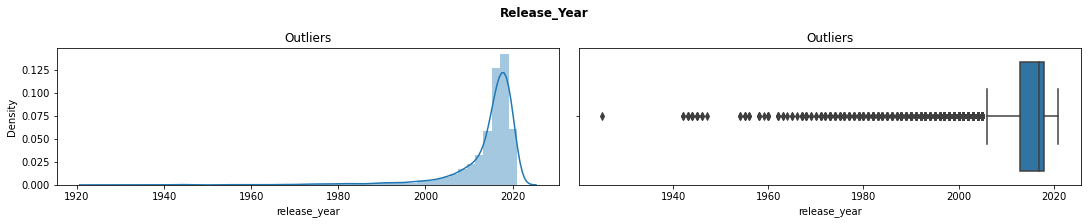

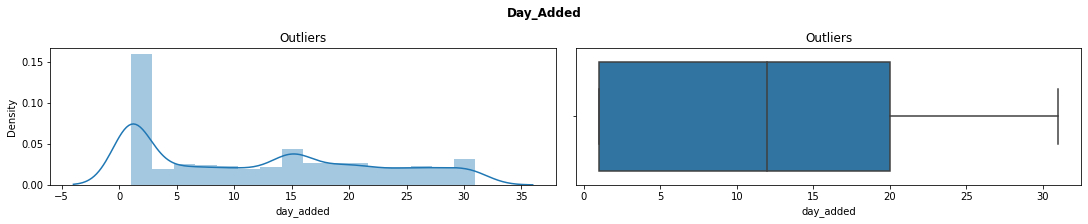

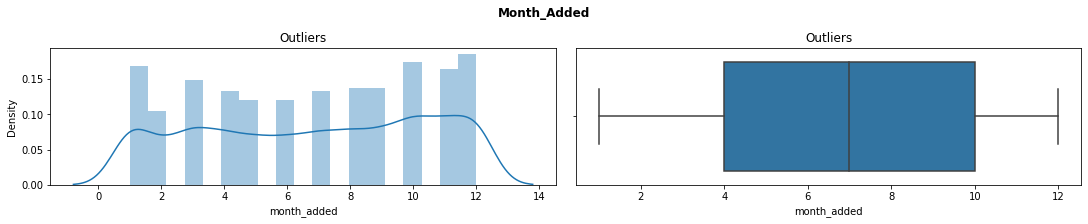

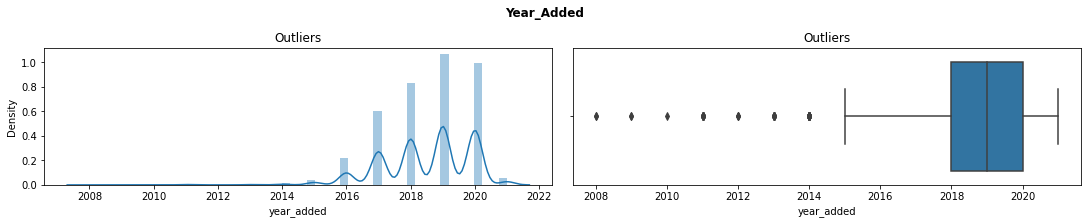

In [14]:
for col in numerical_features:  #subplotting all the values with outliers 
  fig, ax =plt.subplots(1,2, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Outliers")
  sns.boxplot(df[col], ax=ax[1]).set(title="Outliers")
  plt.suptitle(f'{col.title()}',weight='bold')

There are Outliers in column 'release year' and 'year added'. So we apply IQR method to treat Outliers.

In [15]:
for col in ['release_year','year_added']:#redefining the data and setting the outliers value with the range
  
  lower_cap, q1, q3, upper_cap, median = df[col].quantile([0.01,0.25,0.75,0.99,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  
  df[col] = np.where(df[col] > upper_limit, median,np.where(
                         df[col] < lower_limit,median,np.where(
                         df[col] < lower_cap,lower_cap,np.where(
                         df[col] > upper_cap,upper_cap,df[col]))))

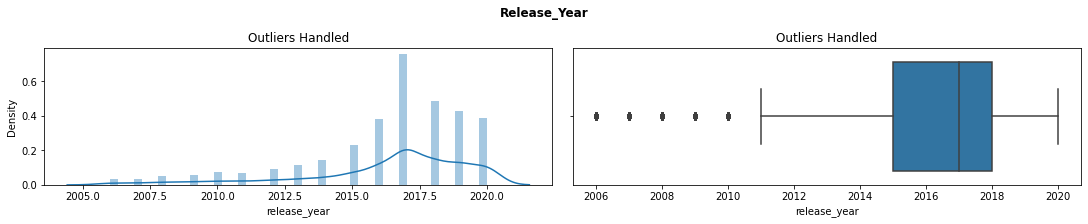

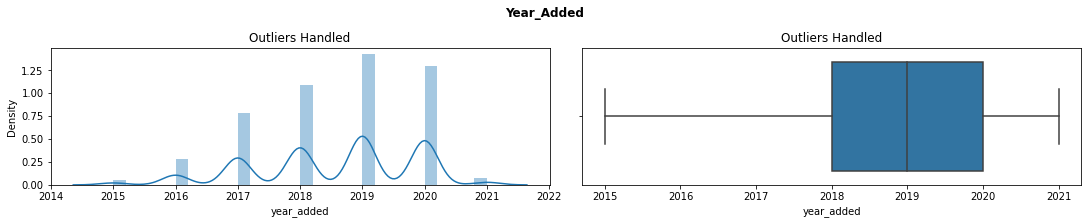

In [16]:
for col in ['release_year','year_added']:
  fig, ax =plt.subplots(1,2, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Outliers Handled")
  sns.boxplot(df[col], ax=ax[1]).set(title="Outliers Handled")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

## **EXPLORATORY DATA ANALYSIS**


### **Release year of Movies/TV Shows**

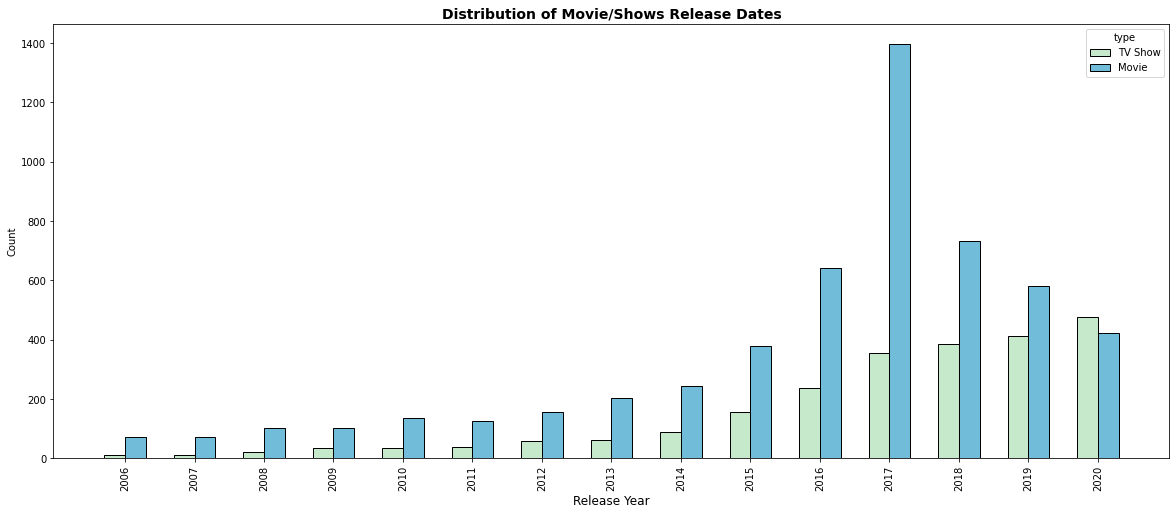

In [17]:
a = plt.figure(figsize=(20,8))
a = sns.histplot(x='release_year', hue = 'type', multiple="dodge", data = df,discrete=True, palette ="GnBu", shrink=.6,bins=50)
a = plt.xticks(ticks= np.arange(df.release_year.min(),df.release_year.max()+1,1), rotation = 90)
a = plt.title('Distribution of Movie/Shows Release Dates',fontsize = 14, fontweight='bold')
a = plt.xlabel('Release Year',fontsize = 12)

* Maximum number of Movies streaming on the platform were released in 2017.
* Most TV Shows streaming on the platform were released after 2015
* Since the number of movies releasing each year has started decreasing after * * 2017 whereas number of TV Shows have increased gradually after 2015.

### **Number of Movies/TV Shows added per Year and per Month**

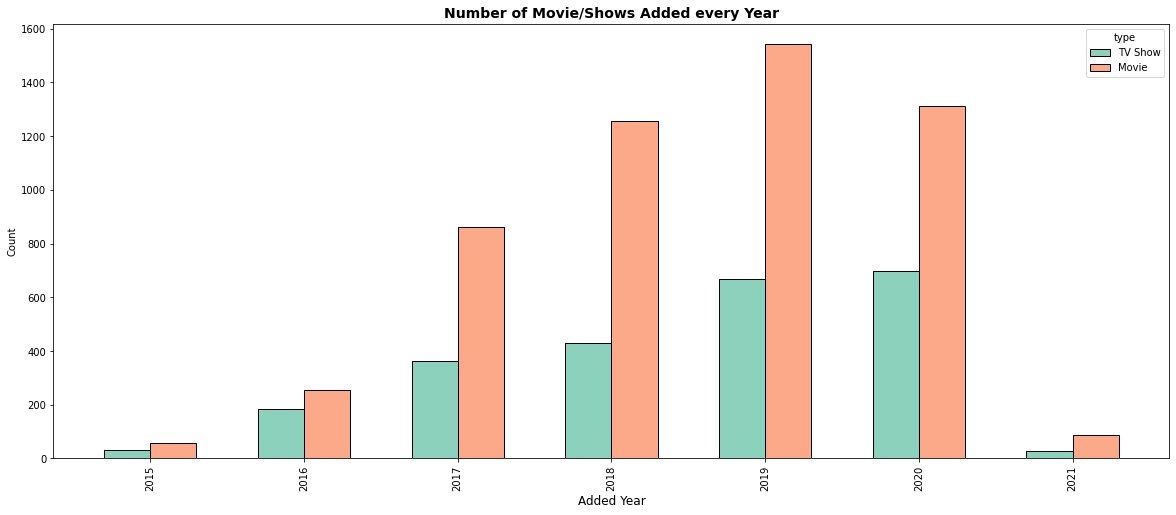

In [18]:
a = plt.figure(figsize=(20,8))
a = sns.histplot(x='year_added', hue = 'type', multiple="dodge", data = df,discrete=True, palette ="Set2",shrink=.6,bins=50)
a = plt.xticks(ticks= np.arange(df.year_added.min(),df.year_added.max()+1,1), rotation = 90)
a = plt.title('Number of Movie/Shows Added every Year',fontsize = 14, fontweight='bold')
a = plt.xlabel('Added Year',fontsize = 12)

* Number of movies added to the platform showed a deliberate increase after 2017 to 2019 and has been decreased after that.
* Whereas TV Shows have been added continuously from 2015 and its number been increased every year.

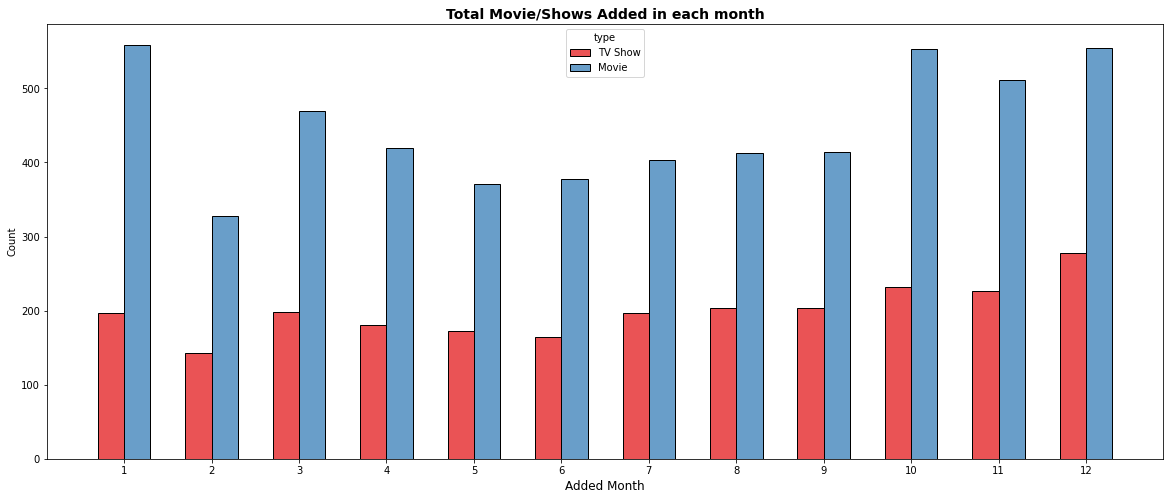

In [19]:
a = plt.figure(figsize=(20,8))
a = sns.histplot(x='month_added', hue = 'type', multiple="dodge", data = df,discrete=True, palette ="Set1",shrink=.6,bins=50)
a = plt.xticks(ticks= np.arange(df.month_added.min(),df.month_added.max()+1,1))
a = plt.title('Total Movie/Shows Added in each month',fontsize = 14, fontweight='bold')
a = plt.xlabel('Added Month',fontsize = 12)

Most number of Movies and TV Shows are added between October and January

### **Top 10 Directors**

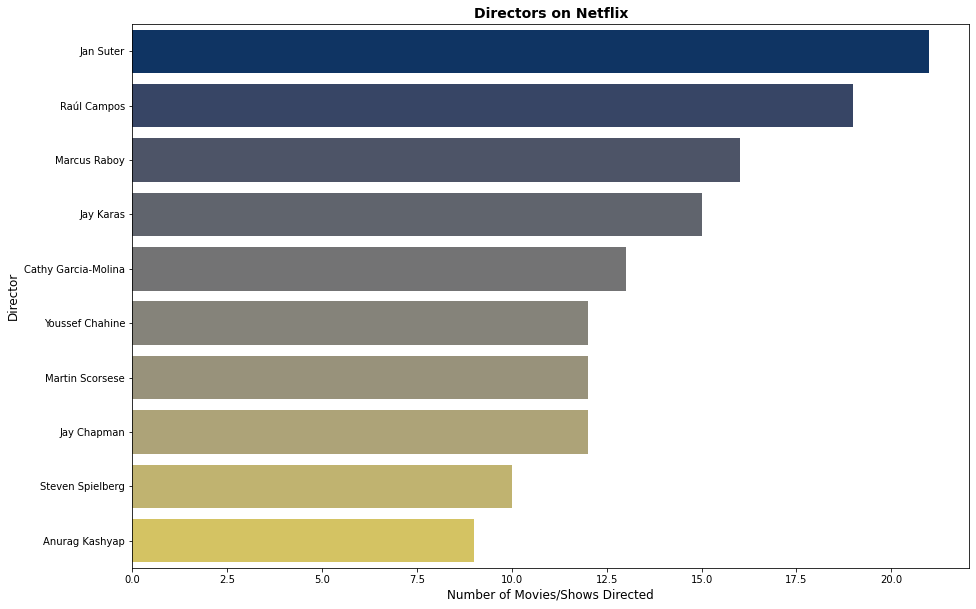

In [20]:
a=df[df.director != 'unknown'].loc[:,['show_id','title','director', 'cast']].copy()
director = (a['director'].to_list())

newlist = []
for genre in director:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
country_list = pd.DataFrame({'Director' : newlist, 'show_id':np.arange(0,len(newlist),1)})
a = country_list.groupby('Director').agg({'show_id':'count'}).sort_values('show_id', ascending= False).reset_index().head(10)
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Director', x = 'show_id',data = a , palette= 'cividis')
a = plt.title('Directors on Netflix',fontsize = 14, fontweight='bold')
a = plt.ylabel('Director',fontsize = 12)
a = plt.xlabel('Number of Movies/Shows Directed',fontsize = 12)
top10directors = country_list.groupby('Director').agg({'show_id':'count'}).sort_values('show_id', ascending= False).reset_index().head(10)['Director'].to_list

Top 3 Directors are-

1. Jan Suter
2. Raul Campos
3. Marcus Raboy

### **Top 10 Actors**


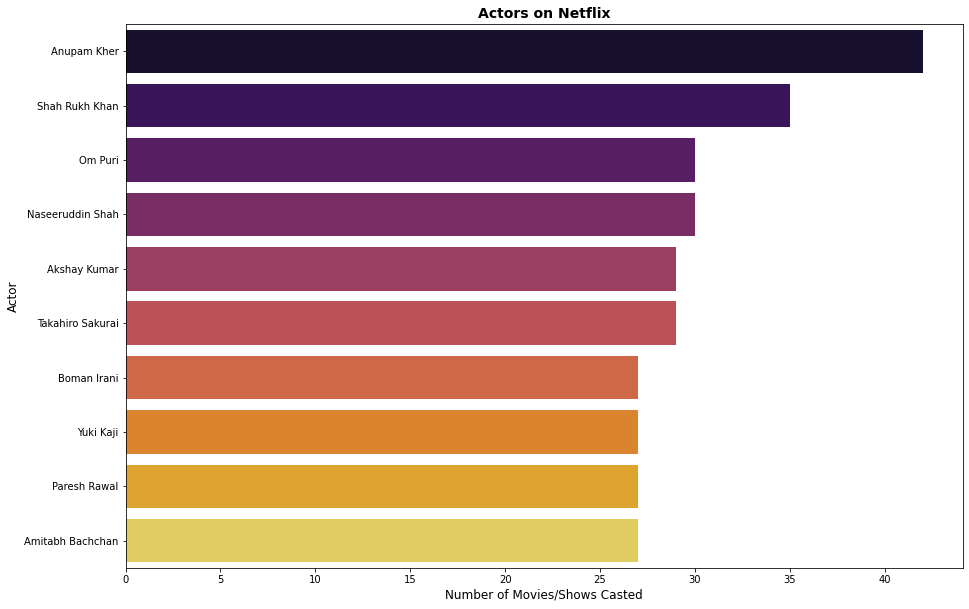

In [21]:
a=df[df.cast != 'No cast'].loc[:,['show_id','title','director', 'cast']].copy()
cast = (a['cast'].to_list())

newlist = []
for genre in cast:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
country_list = pd.DataFrame({'Actor' : newlist, 'show_id':np.arange(0,len(newlist),1)})
a = country_list.groupby('Actor').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Actor', x = 'show_id',data = a , palette= 'inferno')
a = plt.title('Actors on Netflix',fontsize = 14, fontweight='bold')
a = plt.ylabel('Actor',fontsize = 12)
a = plt.xlabel('Number of Movies/Shows Casted',fontsize = 12)
top10actors = country_list.groupby('Actor').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(20).reset_index()['Actor'].to_list()

Top 3 Actors are

1.   **Anupam Kher**
2.   **Shah Rukh Khan**
3.   **Om Puri**

### **Top Genres on Netflix**

In [22]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

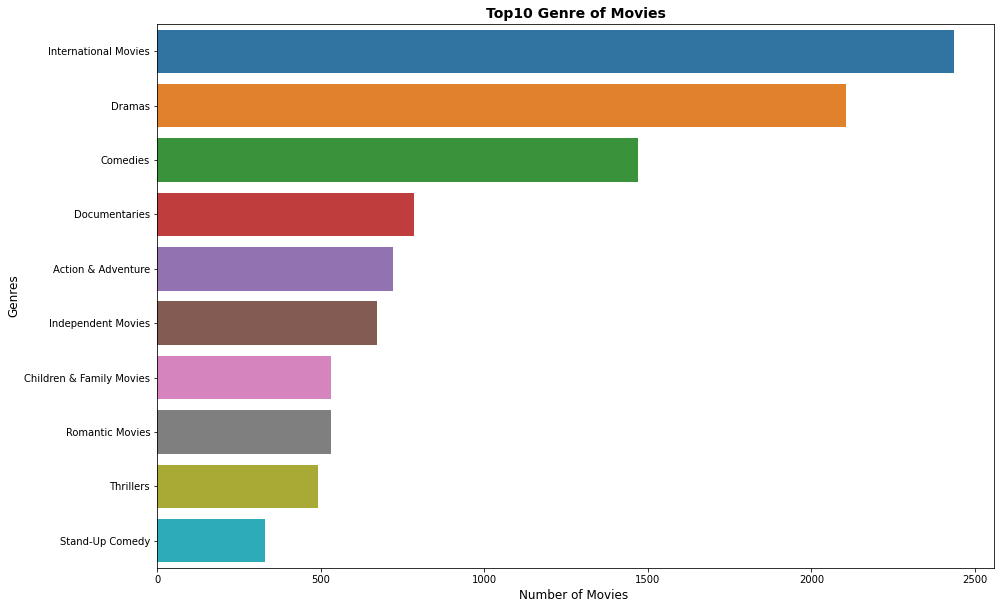

In [23]:
a=movies.loc[:,['show_id','listed_in']].copy()
movie = (a['listed_in'].to_list())

movie_list = []
for genre in movie:
  if ',' in genre:
    a = genre.split(', ')
    movie_list = movie_list + a
  else:
    movie_list.append(genre)
movie_list = pd.DataFrame({'listed_in' : movie_list, 'show_id':np.arange(0,len(movie_list),1)})
a = movie_list.groupby('listed_in').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'listed_in', x = 'show_id',data = a )
a = plt.title('Top10 Genre of Movies',fontsize = 14, fontweight='bold')
a = plt.ylabel('Genres',fontsize = 12)
a = plt.xlabel('Number of Movies ',fontsize = 12)
top10_movie_genre = movie_list.groupby('listed_in').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()['listed_in'].to_list()

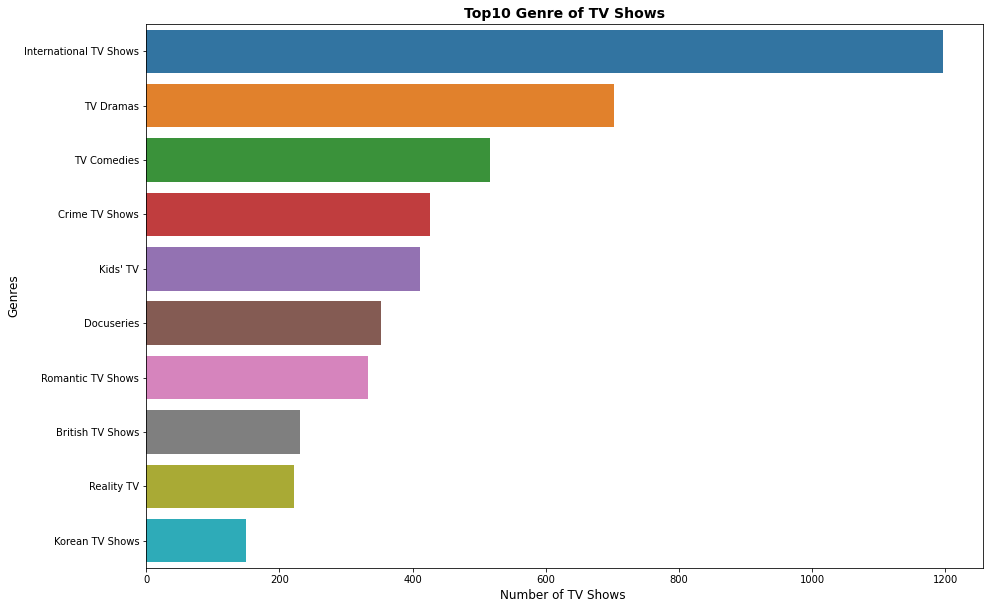

In [24]:
a=tv_shows.loc[:,['show_id','listed_in']].copy()
tv = (a['listed_in'].to_list())

tv_show_list = []
for genre in tv:
  if ',' in genre:
    a = genre.split(', ')
    tv_show_list = tv_show_list + a
  else:
    tv_show_list.append(genre)
tv_show_list = pd.DataFrame({'listed_in' : tv_show_list, 'show_id':np.arange(0,len(tv_show_list),1)})
a = tv_show_list.groupby('listed_in').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'listed_in', x = 'show_id',data = a )
a = plt.title('Top10 Genre of TV Shows',fontsize = 14, fontweight='bold')
a = plt.ylabel('Genres',fontsize = 12)
a = plt.xlabel('Number of TV Shows ',fontsize = 12)
top_10_tv_show_genre = tv_show_list.groupby('listed_in').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()['listed_in'].to_list()

In both Movies and TV Shows top genres are International Movies/Shows, Dramas and Comedies.

### **Top 10 Countries producing content on Netflix**

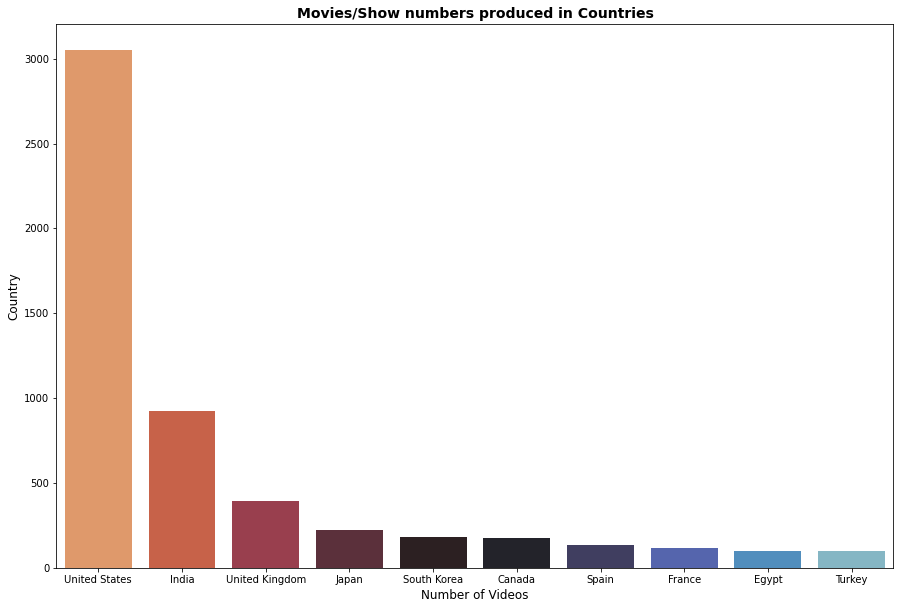

In [25]:
a = df.loc[:,['show_id','title','country']].copy()
country_list = (a['country'].to_list())

newlist = []
for country in country_list:
  if ',' in country:
    a = genre.split(', ')
    country_list = country_list + a
  else:
    newlist.append(country)

country_list = pd.DataFrame({'country' : newlist, 'show_id':np.arange(0,len(newlist),1)})
a = country_list.groupby('country').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(x = 'country', y = 'show_id',data = a , palette='icefire_r')
a = plt.title('Movies/Show numbers produced in Countries',fontsize = 14, fontweight='bold')
a = plt.ylabel('Country',fontsize = 12)
a = plt.xlabel('Number of Videos',fontsize = 12)
top10countries = country_list.groupby('country').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()['country'].unique()

United States is the country producing maximum content on Netflix followed by India and UK.

### **Ratings of content**

Netflix Rating of Movies/TV Shows based on content:-

* TV-MA :for Mature Audiences

* R : Restricted

* PG-13 : Parents strongly cautioned. May be Inappropriate for ages 12 and under

* TV-14 : Parents strongly cautioned. May not be suitable for ages 14 and under

* TV-PG : Parental Guidance suggested

* NR : Not Rated

* TV-G : Suitable for General Audiences

* TV-Y : Designed to be appropriate for all children

* PG : Parental Guidance suggested

* G : Suitable for General Audiences

* NC-17 : the content isn't suitable for children under 17 and younger

* TV-Y7-FV : Suitable for ages 7 and up

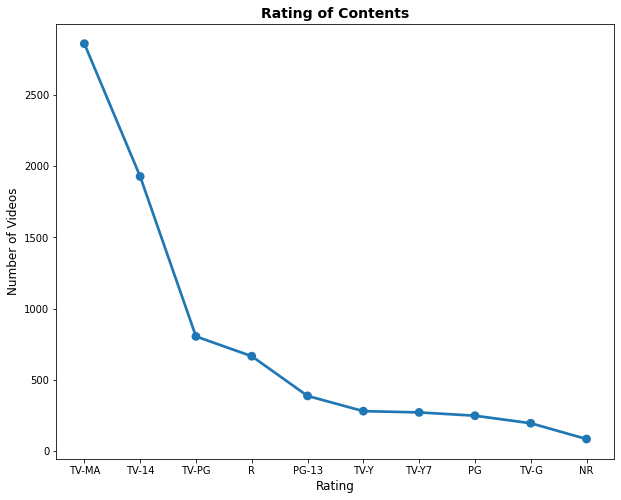

In [26]:
# Rating
a = df.loc[:,['show_id','title','rating']].copy()
rating_list = (a['rating'].to_list())

newlist = []
for rating in rating_list:
  newlist.append(rating)

rating_list = pd.DataFrame({'rating' : newlist, 'show_id':np.arange(0,len(newlist),1)})
a = rating_list.groupby('rating').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()
plt.figure(figsize=(10,8))
a = sns.pointplot(x = 'rating', y = 'show_id',data = a )
a = plt.title('Rating of Contents',fontsize = 14, fontweight='bold')
a = plt.xlabel('Rating',fontsize = 12)
a = plt.ylabel('Number of Videos',fontsize = 12)
top10countries = rating_list.groupby('rating').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()['rating'].unique()

Most content on Netflix is rated for Mature Audiences(MA) and over 14 years old

### **Duration of Movies/TV Shows**

<Figure size 576x576 with 0 Axes>

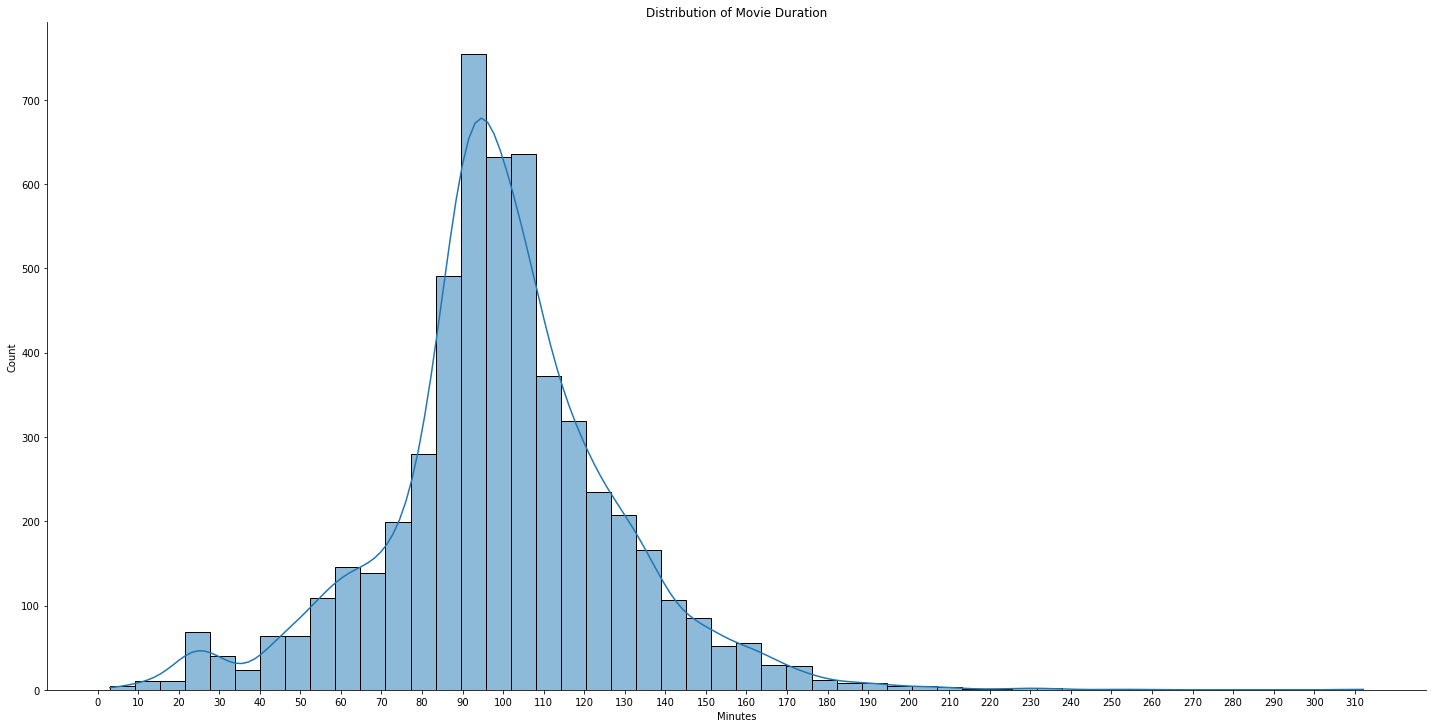

In [27]:
a=df[df['type']=='Movie'].loc[:,['show_id','title','duration']].copy()
duration = (a['duration'].to_list())

duration_list = []
for duration in duration:
  duration_list.append(int(duration.split(' ')[0]))
duration_list = pd.DataFrame({'Duration' : duration_list, 'show_id':np.arange(0,len(duration_list),1)})
plt.figure(figsize=(8,8))
a = sns.displot(x= 'Duration',  data = duration_list, kind = 'hist', height=10, aspect=2, bins = 50,kde=True)
a = plt.title('Distribution of Movie Duration')
a = plt.xlabel('Minutes')
a = plt.xticks(ticks = np.arange(0,duration_list.Duration.max()+1,10))

Most movies on Netflix have a duration range from 80 to 120 minutes

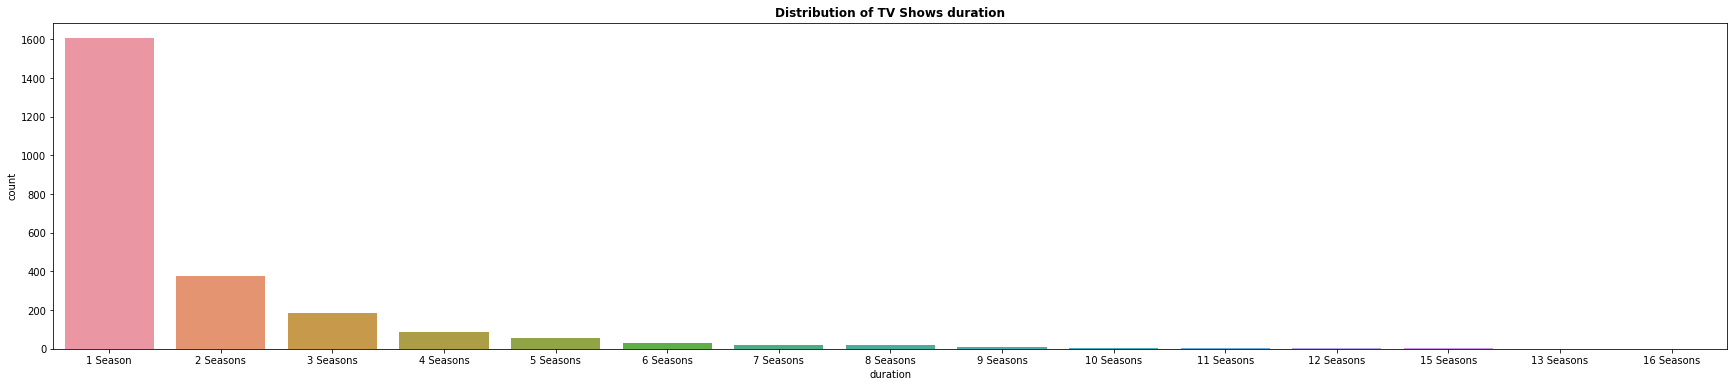

In [28]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

More number of TV shows are having single season

**Longest TV Shows**

In [29]:
#Finding Longest TV Shows
tv_shows['duration']=tv_shows['duration'].str.replace('Season','')
tv_shows['duration']=tv_shows['duration'].str.replace('s','')
tv_shows['duration']=tv_shows['duration'].astype(str).astype(int)
long_shows = tv_shows[tv_shows['duration']>9]
long_shows_df = long_shows[['title','duration']]
long_shows_df.sort_values(by=['duration'],ascending=False)

,title,duration
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
1300,Cheers,11
2678,Heartland,11
1577,Dad's Army,10
1597,Danger Mouse: Classic Collection,10


Grey's Anatomy is the longest TV Show with 16 Seasons

## **Feature Engineering**

we will add all text based and categorical columns to cluster similar content based on text based features.

In [30]:
# We will add all categorical and text based columns
df_1 = df.copy()
df_1['text_info'] = df_1['listed_in'] +' '+ df_1['rating'] + ' ' + df_1['description']

In [31]:
# Checking 
df_1['text_info'][0]

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy TV-MA In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### **Text Cleaning**

In [32]:
import re
# Removing everything except the alphabets
def clean_text(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))

In [33]:
# Applying above function on our combined column
df_1['text_info'] = df_1['text_info'].apply(clean_text)

In [34]:
# we will convert all words in lowercase
df_1['text_info'] = df_1['text_info'].str.lower()

In [35]:
# Checking 
df_1['text_info'][0]

'international tv shows tv dramas tv scifi  fantasy tvma in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor'

#### **WORD TOKENIZATION**

In [36]:
# Applying Tokenization
def tokenizer(txt):  
  tokens = word_tokenize(txt) 
  return tokens
df_1['Processed Text'] = df_1['text_info'].apply(tokenizer)

In [37]:
print(df_1['Processed Text'][0])

['international', 'tv', 'shows', 'tv', 'dramas', 'tv', 'scifi', 'fantasy', 'tvma', 'in', 'a', 'future', 'where', 'the', 'elite', 'inhabit', 'an', 'island', 'paradise', 'far', 'from', 'the', 'crowded', 'slums', 'you', 'get', 'one', 'chance', 'to', 'join', 'the', 'saved', 'from', 'squalor']


#### **PUNCTUATION REMOVAL**

In [38]:
# Applying function to remove Punctuation
regular_punct = list(string.punctuation)
def remove_punctuation(text,punct_list):
  tokens = text
  new_tok = []
  for i in tokens:
    word = i
    for punctuation in list(string.punctuation):
      word = word.replace(punctuation, ' ')
    if word.replace(' ','').isalnum():
      new_tok.append(word)

  return ' '.join(new_tok).split(' ')

df_1['Processed Text'] = df_1['Processed Text'].apply(lambda x : remove_punctuation(x, regular_punct))

#### **STOP WORD REMOVAL**

In [39]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [40]:
# Applying function to remove Stop words
stop_words = set(stopwords.words('english')) 

def remove_stop(tokens, stopwords):
  return [t.lower() for t in tokens if t.lower() not in stopwords]

df_1['Processed Text'] = df_1['Processed Text'].apply(lambda x : remove_stop(x, stop_words))

In [41]:
print(df_1['Processed Text'][0])

['international', 'tv', 'shows', 'tv', 'dramas', 'tv', 'scifi', 'fantasy', 'tvma', 'future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slums', 'get', 'one', 'chance', 'join', 'saved', 'squalor']


#### **LEMMATIZATION**

Lemmatization is a text normalization technique used in Natural Language Processing (NLP), that switches any kind of a word to its base root mode.

Lemmatization is responsible for grouping different inflected forms of words into the root form, having the same meaning.

In [42]:
# Applying Lemmatization
def clean_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stopwords and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [43]:
le = WordNetLemmatizer()

def stem_text(text):  
  lemmatize = []
  for word in text:
    lemmatize.append(word)
  return lemmatize

df_1['Processed Text'] = df_1['Processed Text'].apply(lambda x : stem_text(x))

In [44]:
#join words fun
def join_words(x):
  return " ".join(set(x))

In [45]:
#final column
df_1['Processed Text'] = df_1['Processed Text'].apply(join_words)

In [46]:
df_1['Processed Text']

0       get future dramas tv one paradise inhabit crow...
1       devastating dramas desperately movies survivor...
2       fellow movies r horror confront dead secret tr...
3       ragdoll brave action dangerous machines movies...
4       las become blackjack casinos brilliant vegas d...
                              ...                        
7782    lebanons deprives dramas grandparents movies l...
7783    tv truth past musicals tycoons international s...
7784    nasty stage movies rapper citys c sounds stree...
7785    looks wizard skilled competing dessert zumbo w...
7786    iconic behind explores look delves musicals en...
Name: Processed Text, Length: 7770, dtype: object

In [47]:
print(df_1['Processed Text'][0])

get future dramas tv one paradise inhabit crowded tvma saved slums scifi elite fantasy far island international join chance shows squalor


#### **TF-IDF-Term Frequency-Inverse Document Frequency**

Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.

**TF** - The term frequency is the number of occurrences of a specific term in a document. Term frequency indicates how important a specific term in a document. Term frequency represents every text from the data as a matrix whose rows are the number of documents and columns are the number of distinct terms throughout all documents.

IDF - Document frequency is the number of documents containing a specific term. Document frequency indicates how common the term is.Inverse document frequency (IDF) is the weight of a term, it aims to reduce the weight of a term if the term’s occurrences are scattered throughout all the documents.

In [48]:
# defining a variable to our dependent variable
words = df_1['Processed Text']

In [49]:
tfidf = TfidfVectorizer(max_features = 5000)    
X = tfidf.fit_transform(words)

In [50]:
# convert X into array form for clustering
X = X.toarray()

In [51]:
X.shape

(7770, 5000)

# **Clustering Algorithms**

## **K-Means Clustering**

In [52]:
silhouette_score_ = [ ]
sum_of_sq_dist = {}
range_n_clusters = [i for i in range(10,15)]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10,random_state=40)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    sum_of_sq_dist[n_clusters] = clusterer.inertia_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])

#### **Elbow method to find optimum k value**

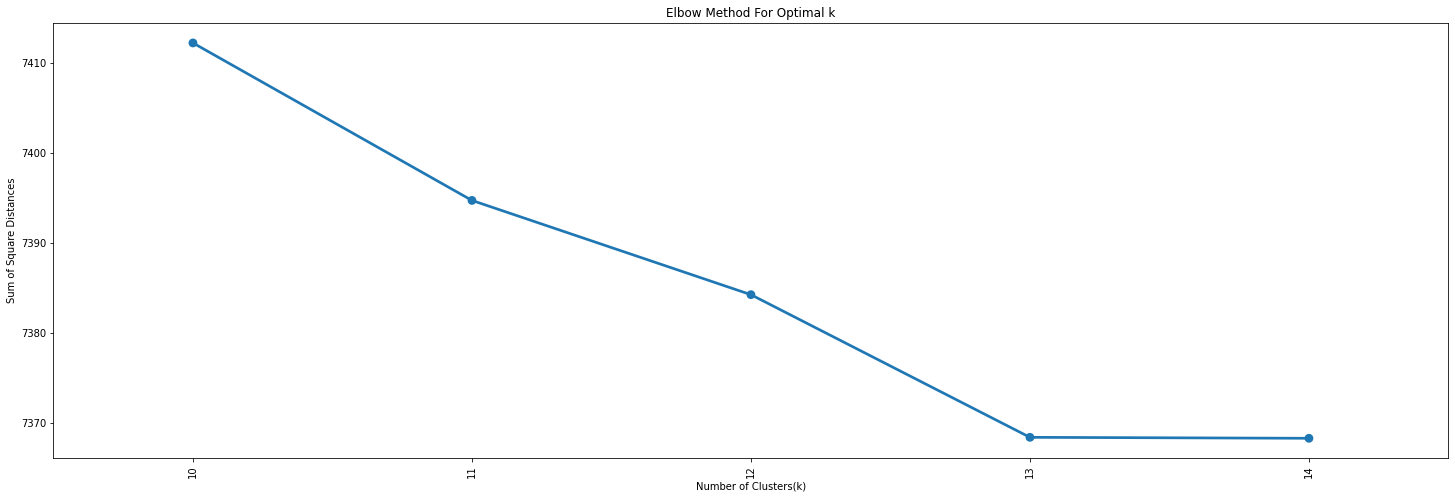

In [53]:
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(25,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.xticks(rotation = 90)
plt.show()

#### **Clusters vs Silhouette score**

In [54]:
Kmeans = pd.DataFrame(silhouette_score_ , columns = ["No of Clusters" , "Silhouette Score"])

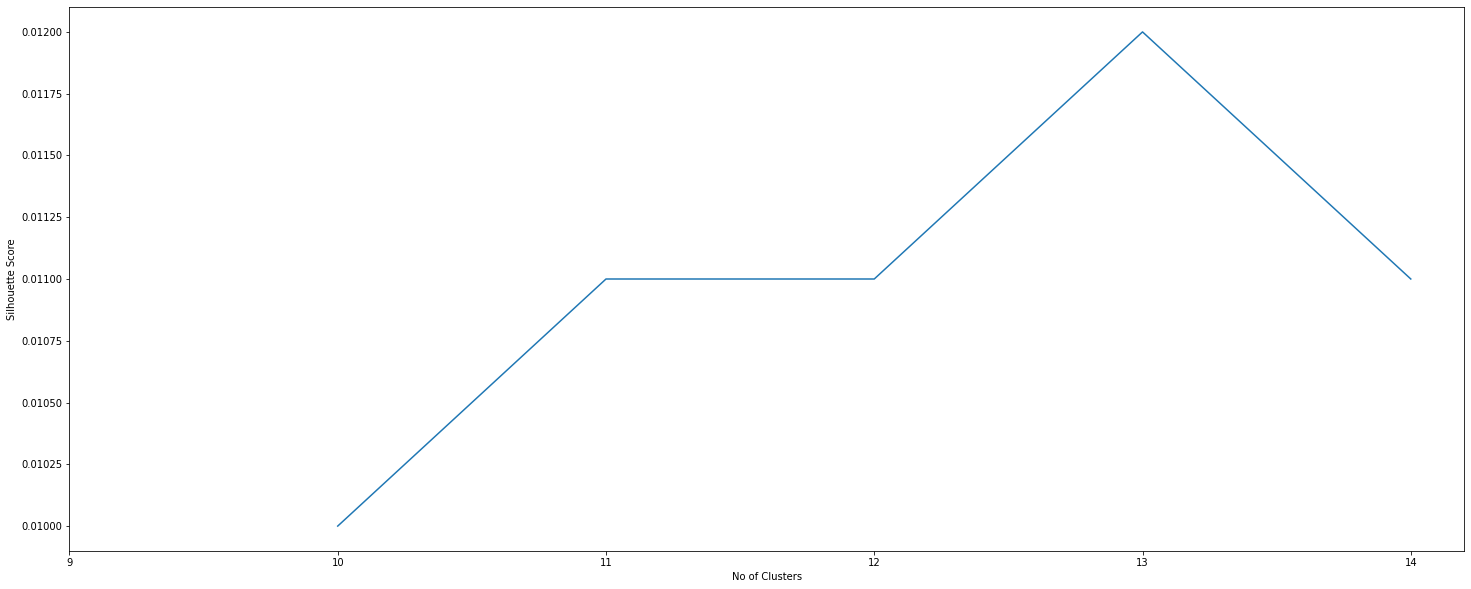

In [55]:
plt.figure(figsize=(25,10))
_ = sns.lineplot(x = Kmeans['No of Clusters'], y = Kmeans['Silhouette Score'])
_ = plt.xticks(ticks = np.arange(9,15,1))

In [56]:
Kmeans.sort_values(['Silhouette Score','No of Clusters'],ascending=False).head()

,No of Clusters,Silhouette Score
3,13,0.012
4,14,0.011
2,12,0.011
1,11,0.011
0,10,0.010


#### **Validation of K value with Silhouette score**

For n_clusters = 10 The average silhouette_score is : 0.010847151142147389
For n_clusters = 11 The average silhouette_score is : 0.010995614285451209
For n_clusters = 12 The average silhouette_score is : 0.01040568214288284
For n_clusters = 13 The average silhouette_score is : 0.011534404793283323
For n_clusters = 14 The average silhouette_score is : 0.011862577509335923


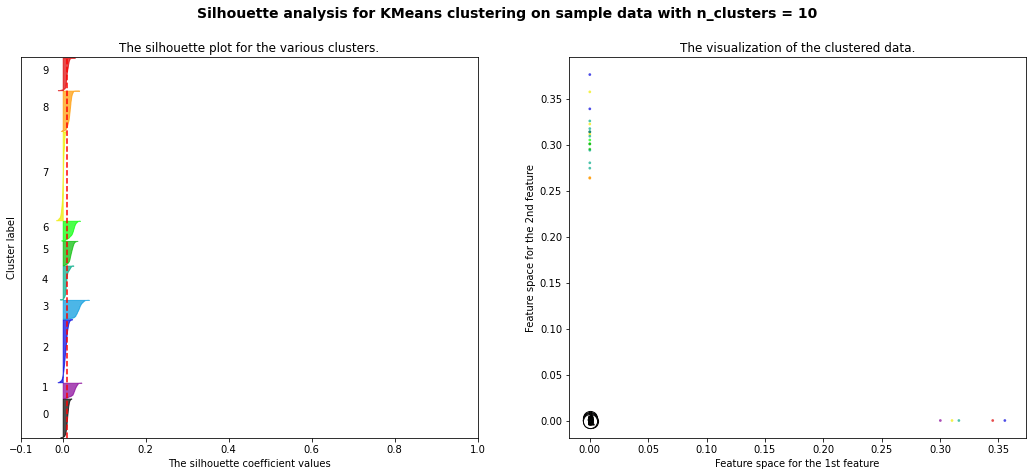

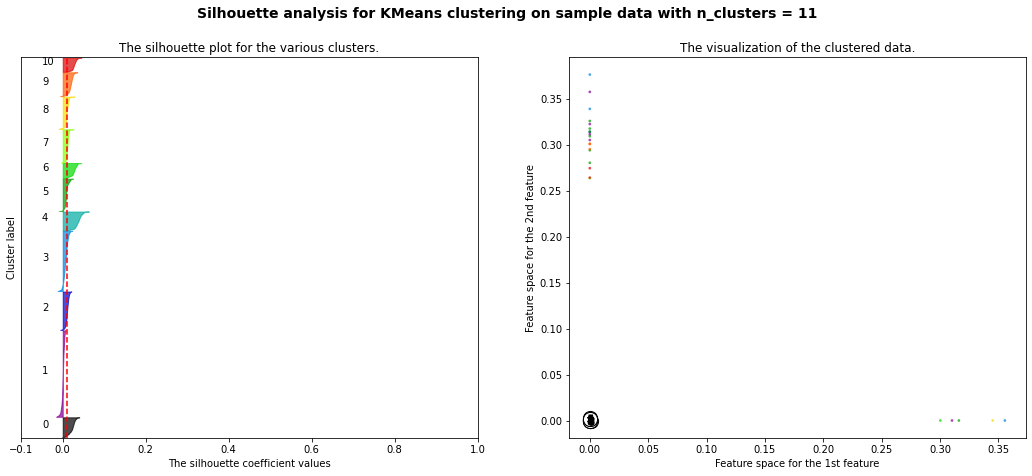

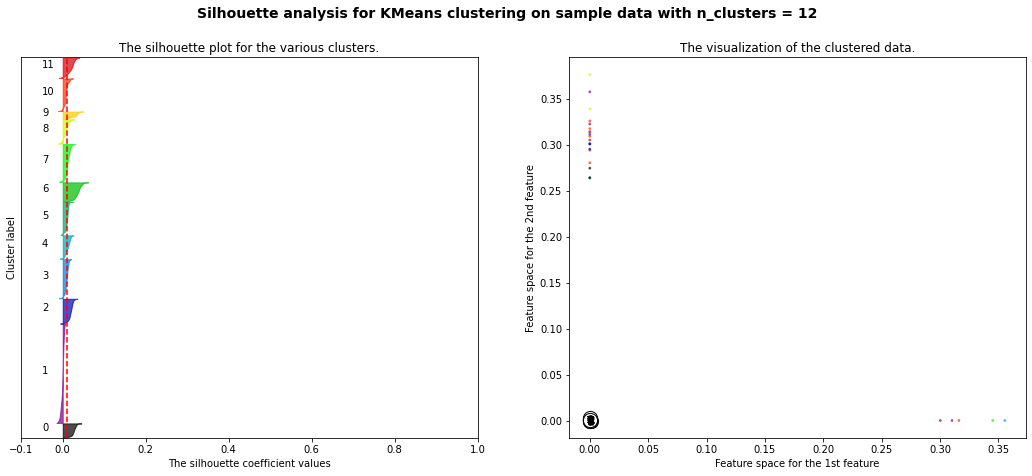

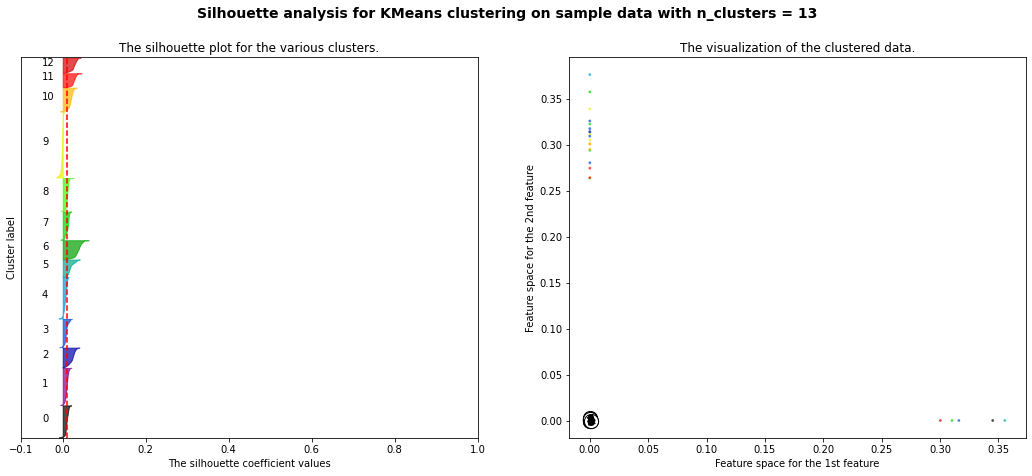

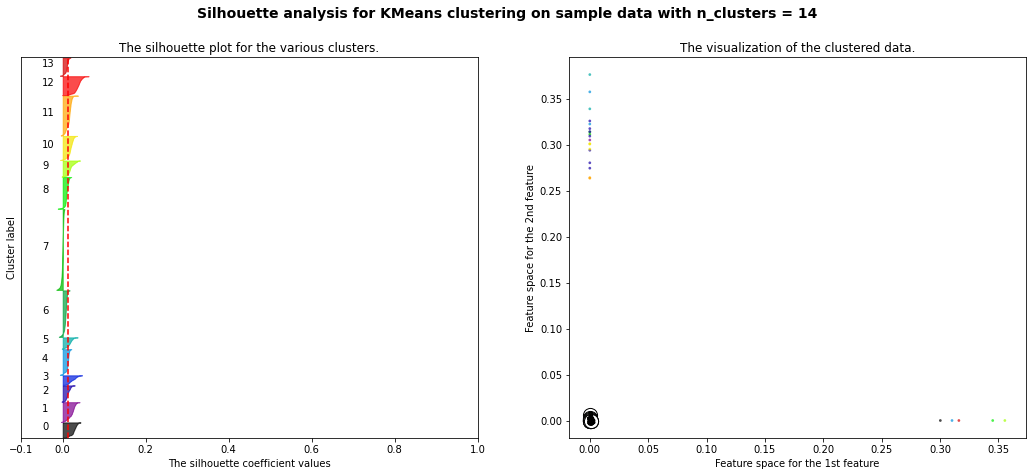

In [57]:
range_n_clusters = [i for i in range(10,15)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

From Silhouette Analysis and Elbow method, the optimal cluster is 13. This gives a clustering score of 0.012

#### **Perform Clustering considering k=13**

In [58]:
#fitting
kmeans = KMeans(n_clusters=13)
kmeans.fit(X)

KMeans(n_clusters=13)

In [59]:
len(kmeans.labels_)
df['label'] = kmeans.labels_
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,label
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020.0,8,10
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016.0,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016.0,12,7
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011.0,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018.0,12,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009.0,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017.0,11,5
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008.0,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020.0,1,7


#### **VISUALIZATION for K = 13 clusters**

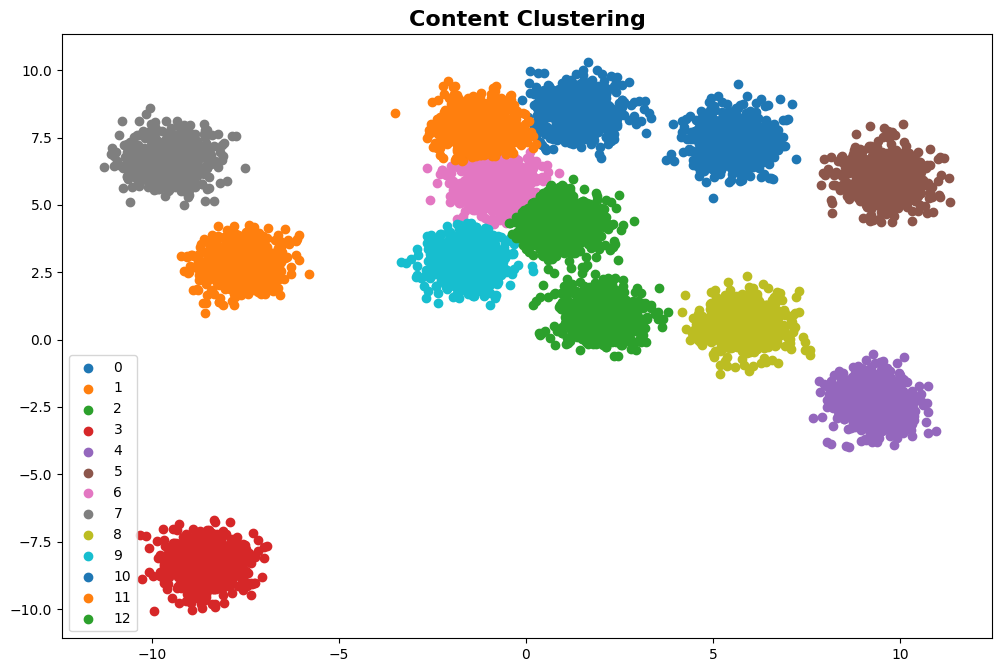

In [60]:
plt.figure(figsize=(12,8), dpi=100)
X, y_true = make_blobs(n_samples=7770, centers=13,
                       cluster_std=0.6, random_state=0)
kmeans= KMeans(n_clusters=13, init= 'k-means++', random_state=9)
kmeans.fit(X)

#predict the labels of clusters.
label = kmeans.fit_predict(X)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.title('Content Clustering',fontsize = 16, fontweight='bold')
plt.show()

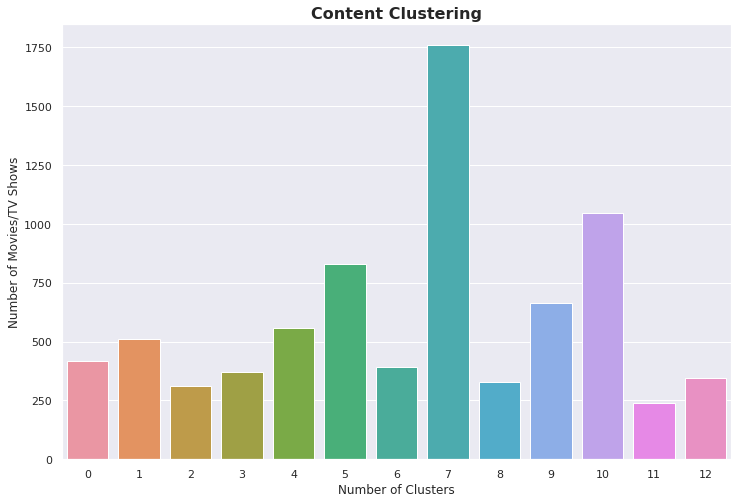

In [61]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_palette("Set1")
ax = sns.countplot(x='label', data = df)
ax.set_title('Content Clustering',fontsize = 16, fontweight='bold')
ax.set_ylabel('Number of Movies/TV Shows',fontsize = 12)
ax.set_xlabel('Number of Clusters',fontsize = 12)
plt.show()

## **Hierarchial Clustering**

In [62]:
hier_ward_euc = sch.linkage(X, method = 'ward', metric = 'euclidean')

### **Dendrogram**

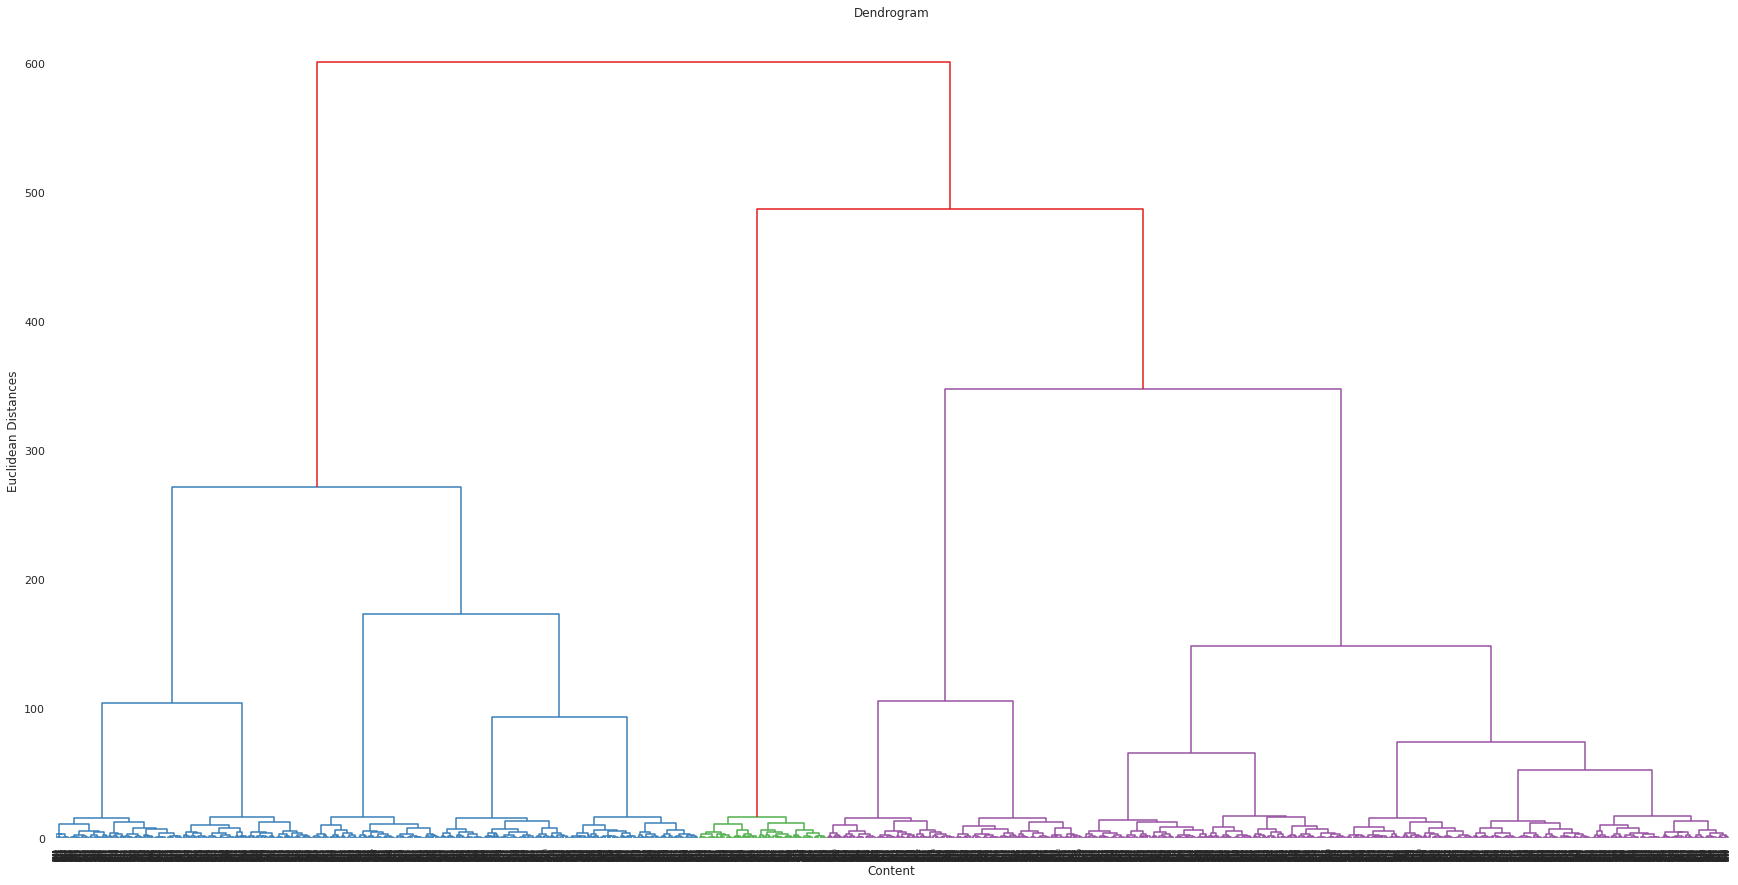

In [63]:
plt.figure(figsize=(30,15))
dendrogram = sch.dendrogram(hier_ward_euc)
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [64]:
clusters = []
scores = []
distances = []
for i in np.arange(5,75,5):
  hc = AgglomerativeClustering(n_clusters = None, distance_threshold = i, affinity = 'euclidean', linkage = 'ward')
  y_hc = hc.fit_predict(X)
  clusters.append(hc.labels_.max()+1)
  if (hc.labels_.max()+1 >=2) :
    scores.append(silhouette_score(X, y_hc))
  else:
    scores.append(1)
  distances.append(i)

hierarchical = pd.DataFrame({'Clusters': clusters, 
                             'Silhouette Scores': scores,
                             'Distance': distances})

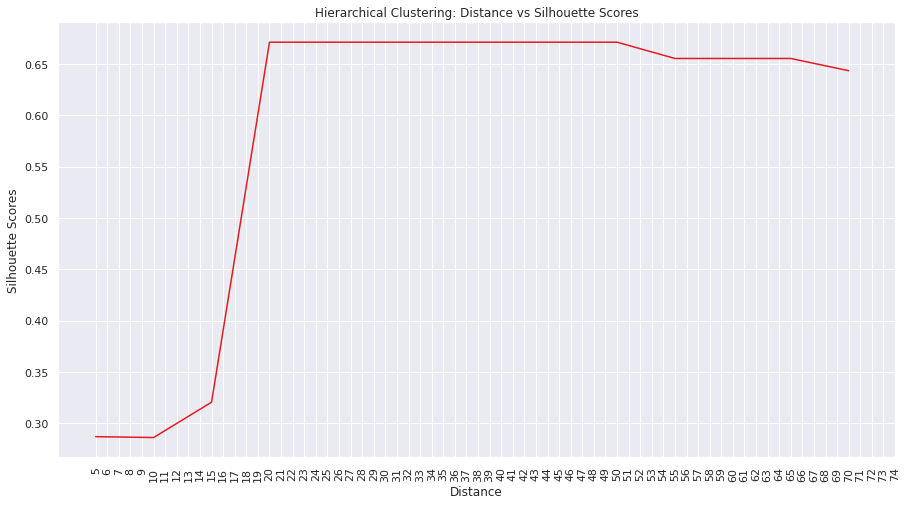

In [65]:
plt.figure(figsize =(15,8))
sns.lineplot(x = 'Distance', y = 'Silhouette Scores' , data = hierarchical)
a = plt.title('Hierarchical Clustering: Distance vs Silhouette Scores')
_ = plt.xticks(np.arange(5,75,1),rotation = 90)

In [66]:
hierarchical.sort_values(['Silhouette Scores'],ascending=False).groupby('Clusters').head()

,Clusters,Silhouette Scores,Distance
3,13,0.671327,20
4,13,0.671327,25
5,13,0.671327,30
6,13,0.671327,35
7,13,0.671327,40
10,12,0.655458,55
11,12,0.655458,60
12,12,0.655458,65
13,11,0.643528,70
2,25,0.320521,15


Highest Silhouette Score of 0.671327 achieved at distance = 20 with 13 clusters

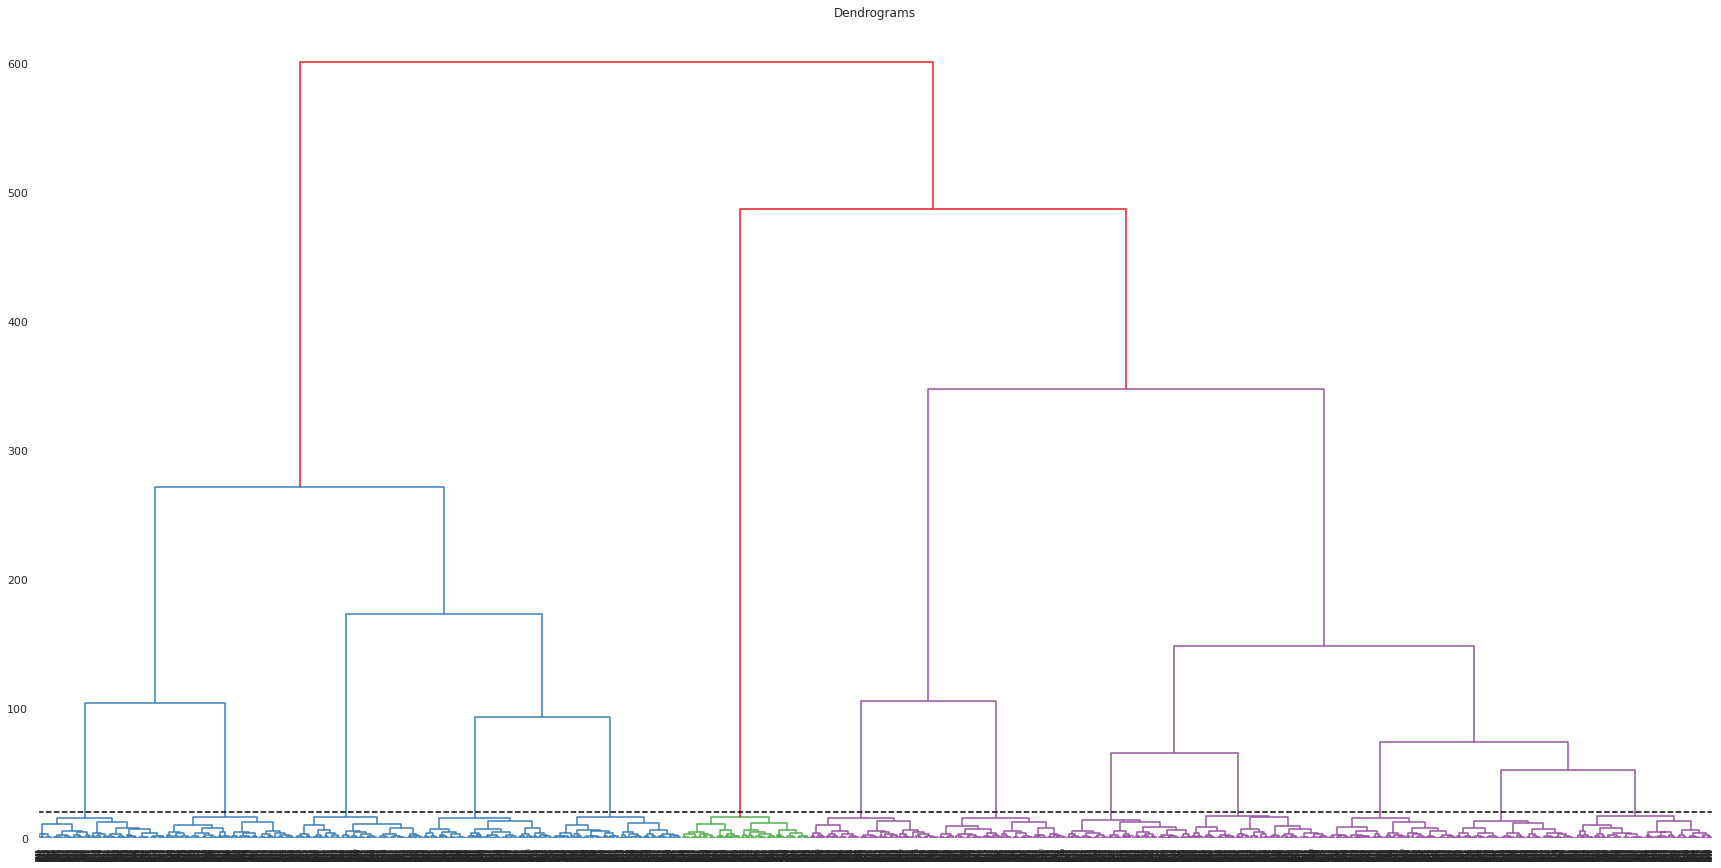

In [67]:
plt.figure(figsize =(30,15))
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.axhline(y= 20, color='black', linestyle='--')

# DB SCAN

In [68]:
dbscan = DBSCAN().fit(X)
preds = dbscan.labels_

In [69]:
db = DBSCAN(eps=0.5, min_samples=100).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 13
Estimated number of noise points: 1039


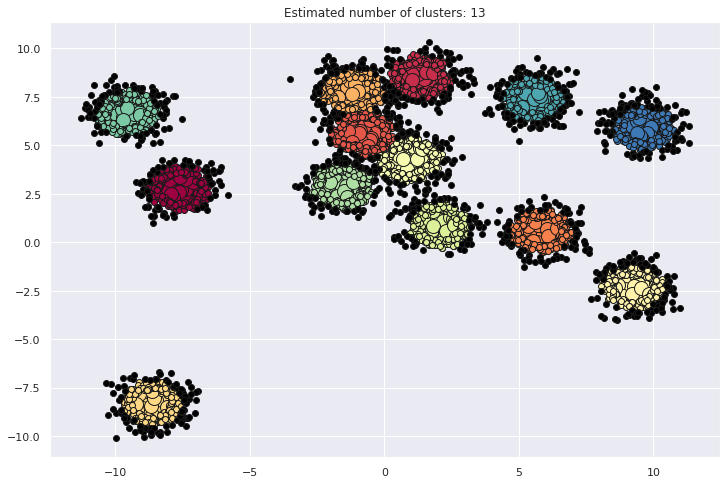

In [70]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

### **WORD CLOUD**

In [71]:
#word cloud for all content
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df[['label',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['label']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

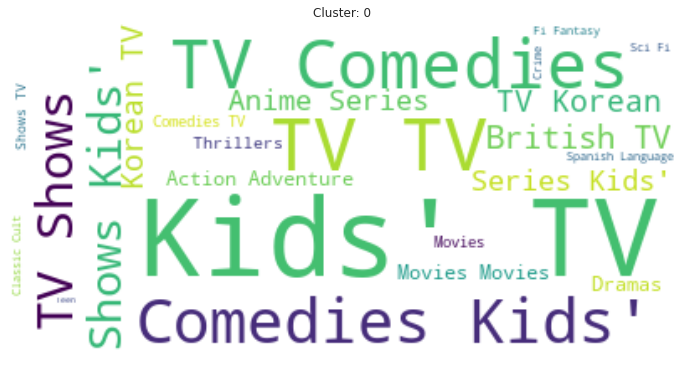

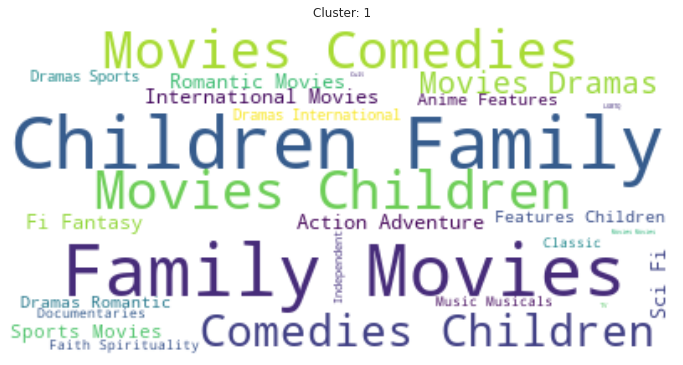

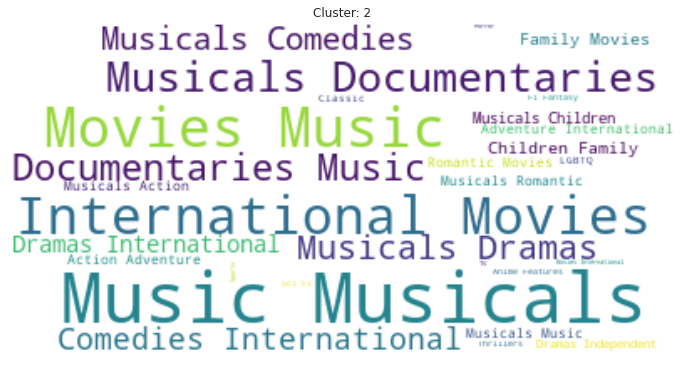

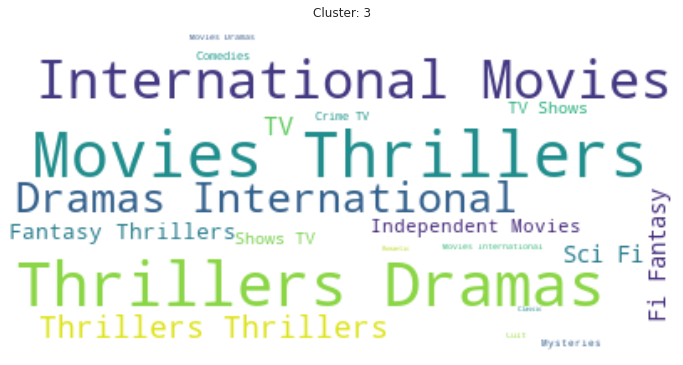

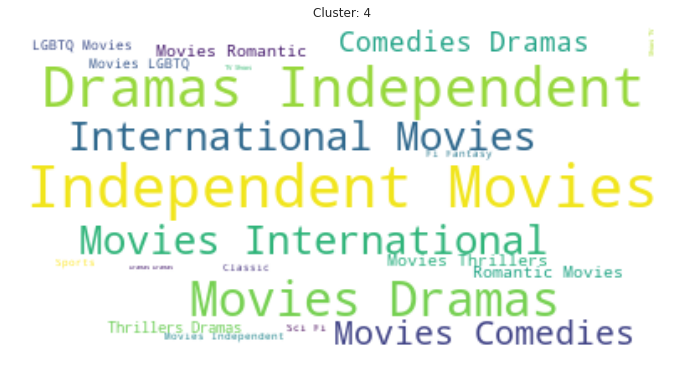

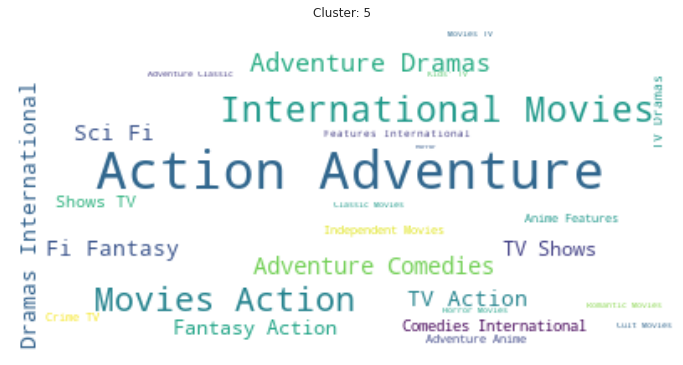

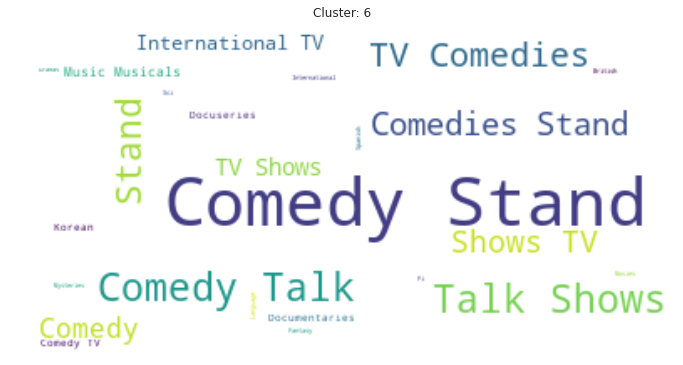

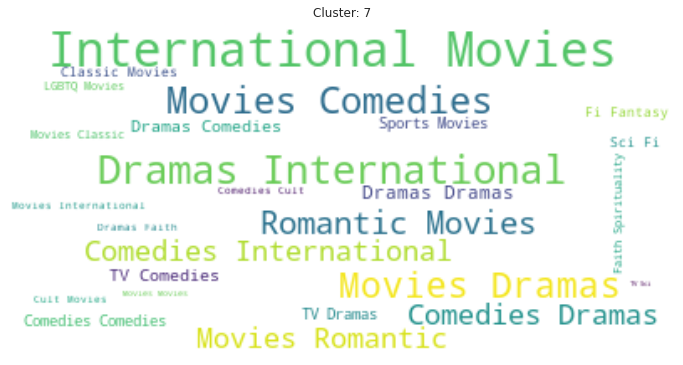

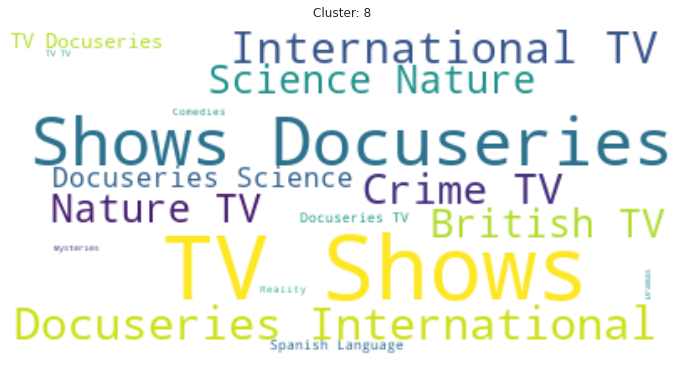

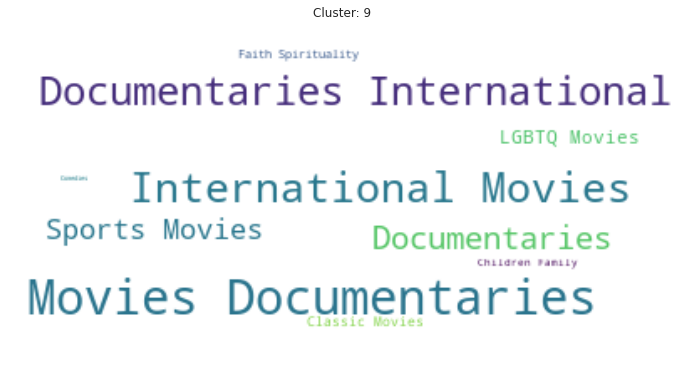

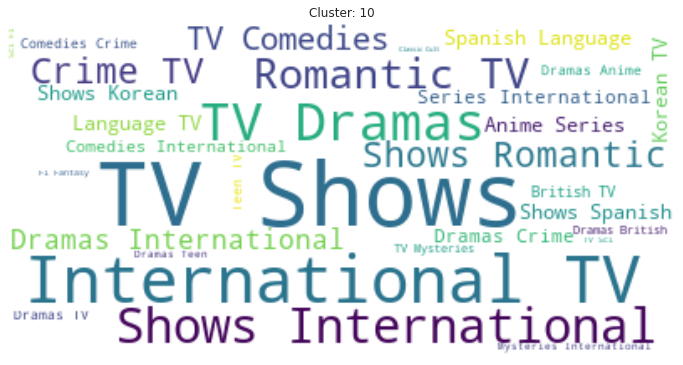

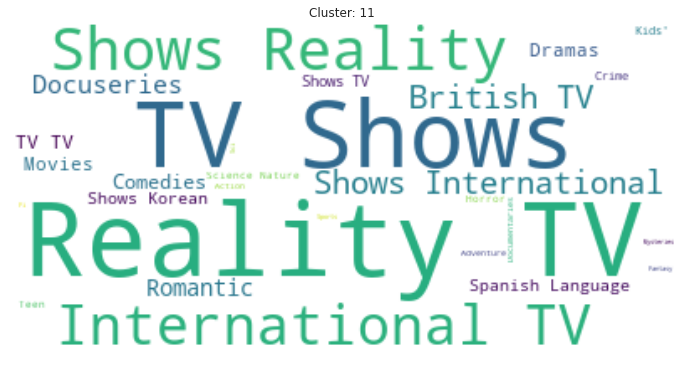

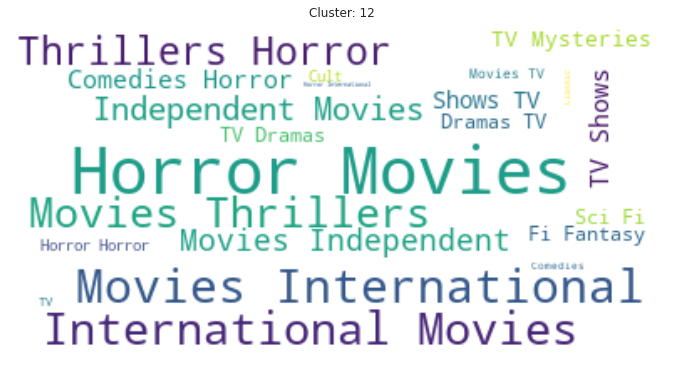

In [72]:
for i in range(13):
  func_select_Category(i,'listed_in')

# **Conclusion**

* Majority of content on Netflix are movies. Netflix has 5372 movies and 2398 TV shows.
* The number of movies on Netflix is growing significantly faster than the number of TV shows.
* We saw a huge increase in the number of movies and TV Shows after 2015. Highest number of movies released in 2017.
* Less Number of movies released after 2017 whereas more number of TV shows were released in this period.
* Most of these contents are released either in the year ending or in the beginning.
* International Movies/TV Shows are the top most genre in netflix which is fllowed by Drama and Comedy movies/TV shows.
* United States is the major content producing country on the platform followed by India, UK, Japan, South Korea.
* Jan Sulter and Raul Campos have directed the most content on Netflix.
* Also 6 of the actors among the top ten actors with maximum content are from India. Anupam Kher, Shah Rukh Khan, Om Puri are top 3 Actors.
* TV-MA tops the rating chart, indicating that mature content is more popular on Netflix.
* Most of the movies have duration between 80 to 120 minutes.
* Most number of TV shows are having single season. Grey's Anatomy is the longest TV Show with 16 Seasons.
* k=13 was found to be an optimal value for clusters using which we grouped our data into 13 distinct clusters.